In [8]:
import sys
sys.path.append('../tools')
import clusterfit as cf
print(cf.angular_separation(128, -16, 80, 30))
print(cf.angular_separation(-56, 66, -68, 20))

65.21482444607726
46.66157916962223


In [68]:
from scipy.integrate import quad
import numpy as np
n=5.4
s=1 # Set as any number, doesn't matter
p = quad(lambda x: 1/np.sqrt(2*np.pi*s**2) * np.e**(-x**2/(s**2)/2), -n*s, n*s)[0]
p = 1 - p # The p(x>n*s) n sigma probability of a normal distribution
print(1-p) 

0.9999999333591032


In [47]:
# The probability of at least one event x>n*s for m events
m=50
1 - (1-p)**m

0.37393749700020007

In [62]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306)
vol0 = 0
for z in [0.06, 0.08, 0.10, 0.12]:
    print(cosmo.comoving_distance(z))
    
    vol1 = 4/3*np.pi*cosmo.comoving_distance(z)**3
    if vol0 == 0:
        vol0 = vol1
    
    print(f'{(vol1 - vol0) / vol0:.2%}')

    vol0 = vol1

    # print(, '\n')

260.455252760345 Mpc
0.00%
345.6163267566517 Mpc
133.66%
429.9369053174122 Mpc
92.50%
513.4113459687144 Mpc
70.29%


In [71]:
import numpy as np
n_cone = 6
idx = np.random.choice(10, size=n_cone, replace=True)
print(idx)

[4 1 4 6 8 7]


In [1]:
1000 / 3e5

0.0033333333333333335

In [1]:
900/3e5

0.003

In [2]:
import pandas as pd
data = pd.read_csv('../data/samples_in_lightcone1_with_trees_duplicate_excision_outlier_excision.csv')
data

,lc_id,redshift,theta_on_lc,phi_on_lc,M_fof_lc,x_lc,y_lc,z_lc,snap_num,MfofSOAP,...,SpectroscopicLikeTemperatureWithoutRecentAGNHeatingCoreExcision,Y5R500WithoutRecentAGNHeating,Vx,Vy,Vz,GalaxyID,TopLeafID,3DLcore/Ltot,ObservedRedshift,Flux
0,1053043,0.035599,49.651315,-63.025458,7.623736e+13,45.340575,-89.083719,117.664041,76,7.627862e+13,...,1.250911,1.156217,-166.732670,-48.232666,402.06738,351976372,351976440,0.802975,0.036585,5.128816e-12
1,11037087,0.119027,-49.755606,122.659972,3.551648e+14,-177.594823,277.057941,-388.815372,75,3.551423e+14,...,2.744662,16.340291,-475.270500,-97.670530,-231.57043,585104399,585104471,0.758501,0.120108,5.947096e-12
2,1161522,0.045438,71.506609,-67.486215,9.885356e+13,24.007158,-57.918988,187.454360,76,9.881861e+13,...,1.572815,2.753879,-239.926510,165.973510,-163.42651,675252036,675252108,0.630400,0.044627,5.383885e-12
3,417200,0.042599,-44.737669,145.320950,1.393237e+14,-108.455511,75.039500,-130.682330,76,1.393631e+14,...,1.728120,4.130818,-283.511000,-100.810910,-106.31091,499177990,499178061,0.587827,0.043293,6.026019e-12
4,810936,0.013063,44.610522,-164.460260,9.170799e+13,-40.213407,-11.182207,41.175553,77,9.167178e+13,...,1.267853,1.548485,-304.018000,-204.217960,172.18207,74538372,74538444,0.517913,0.014309,1.846921e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,1483425,0.029805,74.717073,52.989600,8.473724e+13,20.580486,27.300916,125.120871,76,8.479983e+13,...,1.770476,3.247930,194.269780,-257.630200,51.16980,795279631,795279701,0.015099,0.029894,9.210592e-12
720,1742991,0.131680,-25.094385,-17.246010,4.340813e+14,485.721300,-150.783390,-238.178822,74,4.343071e+14,...,4.083108,36.706185,-77.574100,318.325930,409.42590,496546570,496546636,0.014870,0.130449,6.380110e-12
721,301858,0.020441,-57.156364,-70.673906,2.257063e+14,15.850482,-45.195878,-74.193918,77,2.256748e+14,...,2.501821,8.746539,-314.683530,48.216490,825.71650,593527569,593527643,0.009346,0.017807,1.287589e-11
722,7415872,0.084640,68.568877,35.823687,2.234441e+14,107.836268,77.841761,338.824535,75,2.234757e+14,...,3.535305,19.396090,13.545898,-20.554200,-308.25415,227487661,227487715,0.009186,0.083601,6.499453e-12


In [9]:
v = (data['Vx']**2 + data['Vy']**2 + data['Vz']**2)**0.5

In [10]:
import numpy as np
np.max(v)

1335.7033971067572

In [3]:
data['redshift'].min()

0.0040453672

In [19]:
1335/299792.458

0.0044530806708953305

In [20]:
((1+1335/299792.458) / (1-1335/299792.458))**0.5 - 1

0.004463039934878399

In [21]:
(0.00463 - 0.00453) / 0.00453

0.022075055187637836

In [6]:
0.99**1000

4.317124741065786e-05

In [13]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=68.1, Om0=0.306)
cosmo.comoving_distance(z=0.12)

<Quantity 513.41134597 Mpc>

/var/folders/dq/8n0_5l_14xq0nmzxn5gpnp040000gn/T/ipykernel_20248/3891191429.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, error = integrate.quad(integrand, 0, np.inf)


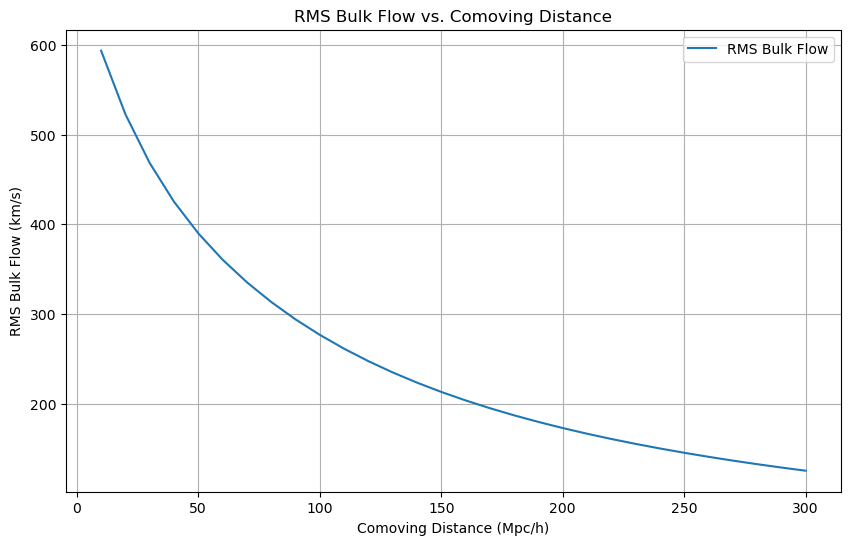

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from colossus.cosmology import cosmology
from scipy import integrate

# Set cosmology
cosmo = cosmology.setCosmology('planck18')

# Define the velocity power spectrum
def P_v(k, z, cosmo):
    f_z = cosmo.growthFactor(z) ** 0.55
    P_k = cosmo.matterPowerSpectrum(k, z)
    return (cosmo.Hz(z) * f_z / k)**2 * P_k

# Integrate to find the bulk flow variance
def bulk_flow_variance(R, z, cosmo):
    integrand = lambda k: P_v(k, z, cosmo) * (3 * (np.sin(k*R) - k*R*np.cos(k*R)) / (k*R)**3)**2 * k**2 / (2*np.pi**2)
    result, error = integrate.quad(integrand, 0, np.inf)
    return result

# Compute the RMS bulk flow for different comoving distances
distances = np.linspace(10, 300, 30) # Mpc/h
z = 0.0 # redshift
bulk_flows = []

for R in distances:
    variance = bulk_flow_variance(R, z, cosmo)
    V_rms = np.sqrt(variance)
    bulk_flows.append(V_rms)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(distances, bulk_flows, label='RMS Bulk Flow')
plt.xlabel('Comoving Distance (Mpc/h)')
plt.ylabel('RMS Bulk Flow (km/s)')
plt.title('RMS Bulk Flow vs. Comoving Distance')
plt.grid(True)
plt.legend()
plt.show()
